# Exploring the BIG5 dataset from the [Open-Source Psychometrics Project](https://openpsychometrics.org/)


### Specifically, the intersection between Extraversion and Age
---

The Big 5 Personality Test is a part of the Open-Source Psychometrics Project, designed to measure individuals across five core dimensions: Extraversion, Emotional Stability, Agreeableness, Conscientiousness, and Intellect/Imagination. It provides a snapshot into these personality traits that impact our behaviors, thoughts, and emotions.

In this case, I will be examining the correlation between Extraversion and Age. In the context of this test, Extroversion is said to be, "an individual's tendency to seek out social interaction and stimulation, as well as their level of enthusiasm and assertiveness in social situations. Individuals who score high on this dimension tend to be outgoing, sociable, and talkative. They enjoy being around others and seek out social situations. They are often described as having a high level of energy, enthusiasm, and assertiveness. They may also be more likely to engage in risk-taking behaviors, such as partying, drinking, or other forms of excitement-seeking. In contrast, individuals who score low on extraversion are more introverted and reserved. They may prefer to spend time alone or in small groups, and may feel uncomfortable in large social gatherings. They may also be less assertive and more cautious in their interactions with others."

It is proven that extraversion is correlated to multiple outcomes, ranging from job performance and social support to overall well-being. We will further explore these conclusions through analyzing the data from this test.

In [92]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [93]:
big5_df = pd.read_csv('data/openpsych_data.csv', sep='\t')

In [94]:
big5_df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


Participants of this survey were tasked to answer 50 of the questions below, 10 questions associated with each of the above traits.

In [95]:
questions = '''
E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings.
N9	I get irritated easily.
N10	I often feel blue.
A1	I feel little concern for others.
A2	I am interested in people.
A3	I insult people.
A4	I sympathize with others' feelings.
A5	I am not interested in other people's problems.
A6	I have a soft heart.
A7	I am not really interested in others.
A8	I take time out for others.
A9	I feel others' emotions.
A10	I make people feel at ease.
C1	I am always prepared.
C2	I leave my belongings around.
C3	I pay attention to details.
C4	I make a mess of things.
C5	I get chores done right away.
C6	I often forget to put things back in their proper place.
C7	I like order.
C8	I shirk my duties.
C9	I follow a schedule.
C10	I am exacting in my work.
O1	I have a rich vocabulary.
O2	I have difficulty understanding abstract ideas.
O3	I have a vivid imagination.
O4	I am not interested in abstract ideas.
O5	I have excellent ideas.
O6	I do not have a good imagination.
O7	I am quick to understand things.
O8	I use difficult words.
O9	I spend time reflecting on things.
O10	I am full of ideas.
'''


In [96]:
big5_questions_df = pd.DataFrame([item.split('\t') for item in questions.splitlines() if item>''])

In [97]:
big5_questions_df

,0,1
0,E1,I am the life of the party.
1,E2,I don't talk a lot.
2,E3,I feel comfortable around people.
3,E4,I keep in the background.
4,E5,I start conversations.
5,E6,I have little to say.
6,E7,I talk to a lot of different people at parties.
7,E8,I don't like to draw attention to myself.
8,E9,I don't mind being the center of attention.
9,E10,I am quiet around strangers.


First, I categorized all of the questions into which trait they fulfill:

In [98]:
factor_map = { 1: 'E', 
               2: 'A',
               3: 'C',
               4: 'N',
               5: 'O' }

In [99]:
ipip_df = pd.read_html('big5_questions.html', header=0)[0]
ipip_df = ipip_df.rename(columns={'Unnamed: 1': 'text', 'Unnamed: 7': 'factor_and_direction'})[['text','factor_and_direction']]
ipip_df[['factor','direction']]=ipip_df['factor_and_direction'].str.extract(r'([1-5])(.)')
ipip_df['category']=ipip_df['factor'].astype(int).map(factor_map)

In [100]:
ipip_df = ipip_df.assign(number=np.repeat(np.arange(1,11),5))
ipip_df = ipip_df.assign(qcode=ipip_df['category'].str.cat(ipip_df['number'].astype(str)))  

In [101]:
neg_items = ipip_df.query('direction=="-"')['qcode']
neg_items

1      A1
3      N1
5      E2
7      C2
9      O2
11     A3
13     N3
15     E4
17     C4
19     O4
21     A5
23     N5
25     E6
27     C6
28     N6
29     O6
31     A7
33     N7
35     E8
37     C8
38     N8
43     N9
45    E10
48    N10
Name: qcode, dtype: str

In [102]:
big5_scored_df = big5_df.copy()

In [103]:
big5_scored_df[neg_items] = 6-big5_df[neg_items]

Then, I sorted the data to just record the Extraversion responses:

In [104]:
E_cols = [f'E{n+1}' for n in range(10)]
E_cols

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']

In [105]:
cat_cols

{'O': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'],
 'A': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']}

In [106]:
for cat, cols in cat_cols.items():
    big5_scored_df[cat]=big5_scored_df[cols].sum(axis=1)

In [107]:
big5_scored_df[['O','C','E','A','N']]

,O,C,E,A,N
0,43,47,44,46,49
1,26,42,22,35,29
2,45,49,35,38,14
3,41,26,22,37,17
4,34,34,34,44,30
...,...,...,...,...,...
19714,35,36,21,42,19
19715,30,32,25,36,39
19716,37,23,21,26,10
19717,42,43,21,38,20


In [108]:
extroversion_items = ['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10']
extroversion_data = big5_df[extroversion_items]

In [109]:
big5_df['extroversion_score'] = extroversion_data.mean(axis=1)

After, I added age as a variable:

In [110]:
age = big5_df['age']

In [111]:
extroversion = big5_df['extroversion_score']

In [112]:
clean_data = big5_df[['age','extroversion_score']].dropna()

In [113]:
corr, p_value = pearsonr(clean_data['age'], clean_data['extroversion_score'])

print("Correlation:", corr)
print("P-value:", p_value)

Correlation: 0.006540007768999916
P-value: 0.35844717966337664


In [114]:
big5_df['age'] = pd.to_numeric(big5_df['age'], errors='coerce')
big5_df['age'].describe()
big5_df['age'].value_counts(dropna=False).head(10)

age
18    1523
17    1370
19    1259
20    1231
21    1216
16    1148
22     970
23     895
15     743
24     703
Name: count, dtype: int64

In [115]:
import numpy as np

big5_df['age'] = pd.to_numeric(big5_df['age'], errors='coerce')

In [116]:
big5_df.loc[(big5_df['age'] < 10) | (big5_df['age'] > 100), 'age'] = np.nan

clean = big5_df[['age', 'extroversion_score']].dropna()

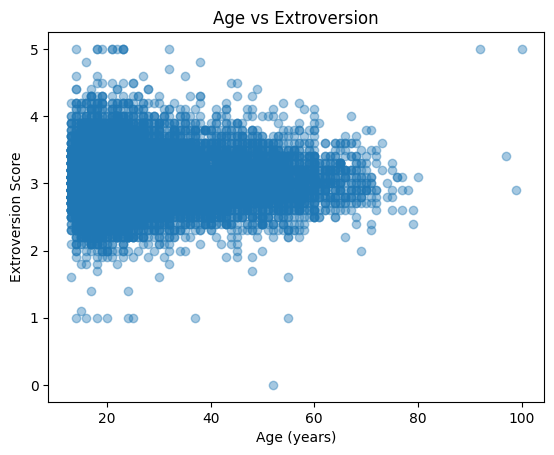

In [117]:
import matplotlib.pyplot as plt

plt.scatter(clean['age'], clean['extroversion_score'], alpha=0.4)
plt.xlabel("Age (years)")
plt.ylabel("Extroversion Score")
plt.title("Age vs Extroversion")
plt.show()

This scatterplot shows the correlation of levels of Age and Extraversion on a 5 point scale. This graph shows a slight negative relationship between age and extraversion, suggesting that extraversion tends to decline modestly across the lifespan. However, it's hard to tell from this initial graph since the data is heavily concentrated towards youth.

I then decided to segment the age data by decade to get a clearer depiction on the average extraversion levels from smaller groups.

In [118]:
clean = big5_df[['age','extroversion_score']].dropna()

In [119]:
clean['age_decade'] = (clean['age'] // 10) * 10

In [120]:
decade_extro = clean.groupby('age_decade')['extroversion_score'].mean()

In [121]:
print(decade_extro)

age_decade
10.0     3.074408
20.0     3.093743
30.0     3.064531
40.0     3.055792
50.0     3.028171
60.0     3.061565
70.0     2.997917
80.0     3.100000
90.0     3.766667
100.0    5.000000
Name: extroversion_score, dtype: float64


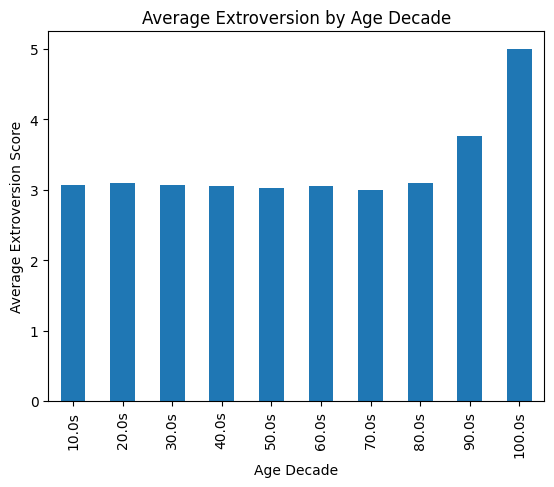

In [122]:
decade_extro.index = decade_extro.index.astype(str) + "s"

decade_extro.plot(kind='bar')

plt.xlabel("Age Decade")
plt.ylabel("Average Extroversion Score")
plt.title("Average Extroversion by Age Decade")
plt.show()

This graph actually counters my initial interpretations from the data, since the bar graph illustrates how extraversion spikes for 90 and 100 year olds whereas extroversion levels stay stagnant and neutral through youth and middle-aged folks. Except this graph doesn't account for the number of participants surveyed from each decade. In the above scatterplot, most of the datapoints were concentrated towards younger generations, signifying that more youth were surveyed than elderly people.

Because of this, I decided to create a final graph illustrating the sample size of each decade.

In [123]:
clean['age_decade'].value_counts().sort_index()

age_decade
10.0     6756
20.0     7528
30.0     2560
40.0     1554
50.0      891
60.0      294
70.0       48
80.0        1
90.0        3
100.0       1
Name: count, dtype: int64

In [124]:
decade_extro = clean.groupby('age_decade')['extroversion_score'].mean()
decade_counts = clean.groupby('age_decade').size()

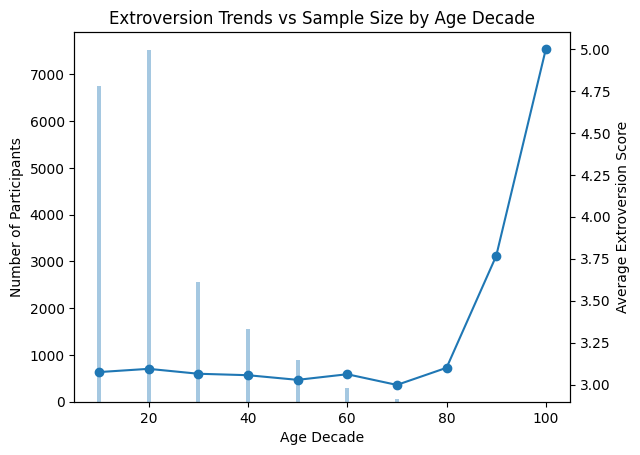

In [125]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.bar(decade_counts.index, decade_counts, alpha=0.4)
ax1.set_xlabel("Age Decade")
ax1.set_ylabel("Number of Participants")
ax2 = ax1.twinx()

ax2.plot(decade_extro.index, decade_extro, marker='o')
ax2.set_ylabel("Average Extroversion Score")

plt.title("Extroversion Trends vs Sample Size by Age Decade")
plt.show()

This final graph properly accounts for the correlation between extraversion and age, accounting for sample size in each of these ages that were segmented by decade. This graph suggests that extraversion remains relatively stable across early and middle adulthood, with only minor fluctuations between individuals in their teens through their sixties. Average extraversion scores appear slightly higher during adolescence and early adulthood, followed by a modest decline into middle age. This pattern aligns with established personality research, suggesting that social energy and novelty-seeking behaviors often decrease gradually as individuals age and shift toward smaller, more stable social networks and life roles.

However, the visualization also highlights an important limitation in the dataset: a significant imbalance in participant distribution across age groups. The majority of respondents were concentrated in the teenage and young adult decades, with over several thousand participants represented in these groups. In contrast, participation declines sharply in older decades, with extremely small sample sizes appearing beyond age seventy. This uneven distribution substantially affects the reliability of the observed trends in later adulthood.

Notably, the graph shows a sharp increase in average extroversion scores among participants in their nineties and beyond. While this appears visually striking, it is likely the result of extremely limited data rather than a meaningful psychological trend. Thus, this information must be interpreted with caution or discounted alto

